   #                                                  Titanic Exercise II
   #### Practice matplotlib & seaborn

![titanic](https://userscontent2.emaze.com/images/a5f68f37-6349-4065-a1fc-921cbe7401b2/958230111417e36d6b3c67ffd7bc3494.jpeg)

First of all, import the needed libraries. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# visualisation libraries

1. Read the `.csv` file you generated in **1_Titanic-Pandas** `titanic_cleaned.csv` and call the variable `titanic`.

Help: If you didn't get to the point in which you should have saved the file, ask the instructor. 

In [3]:
filename = "titanic_cleaned.csv"

In [4]:
titanic = pd.read_csv('../data/' + filename, index_col=0)
titanic.head()

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,embarked,boat,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"


2. Using matplotlib find the appropriate visualization to show the distribution of the column `age`

(array([22., 12.,  7., 10.,  5.,  6.,  4.,  6., 10.,  4.,  4.,  4.,  5.,
         8.,  8., 19., 20., 39., 32., 23., 42., 43., 27., 48., 35., 30.,
        31., 32., 33., 40., 25., 24., 25., 16., 25., 31., 11., 14., 21.,
        18., 14., 18.,  9., 10., 21.,  8., 14., 14.,  9., 15.,  8.,  6.,
         4., 10.,  8.,  5.,  5.,  6.,  3.,  7.,  6.,  5.,  4.,  5.,  3.,
         1.,  1.,  0.,  0.,  2.,  3.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  1.]),
 array([ 0.17    ,  1.167875,  2.16575 ,  3.163625,  4.1615  ,  5.159375,
         6.15725 ,  7.155125,  8.153   ,  9.150875, 10.14875 , 11.146625,
        12.1445  , 13.142375, 14.14025 , 15.138125, 16.136   , 17.133875,
        18.13175 , 19.129625, 20.1275  , 21.125375, 22.12325 , 23.121125,
        24.119   , 25.116875, 26.11475 , 27.112625, 28.1105  , 29.108375,
        30.10625 , 31.104125, 32.102   , 33.099875, 34.09775 , 35.095625,
        36.0935  , 37.091375, 38.08925 , 39.087125, 40.085   , 41.082875,
        42.08075 , 43.07

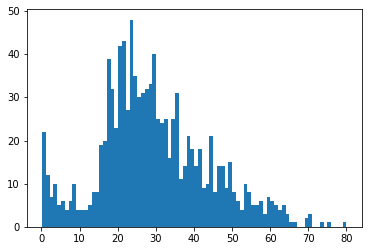

In [5]:
plt.hist(x=titanic.age, bins=80)

3. Now use seaborn to show the distribution of the column `age`.

<AxesSubplot:xlabel='age', ylabel='Count'>

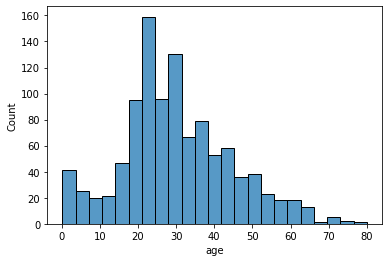

In [9]:
sns.histplot(data=titanic, x='age')

4. Use subplots to plot the distribution of the Age variable with bins equal to 10, 20 and 50.

Use `sns.histplot()` for that aim. 

In [ ]:
#your code here

5. Whether the bin size affects your plot? Why?

In [ ]:
#your comment here

6. Using matplotlib find the appropriate plot to visualize the column `'gender'` 

In [ ]:
# your code here

7. What if you also plot the column `'gender'` using the function [`countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) from the library [`seaborn`](https://seaborn.pydata.org/)?



In [ ]:
#your code

6. Using the function [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html) from the library `seaborn`, find out if the hypothesis _"Women are more likely to survive shipwrecks"_ is true or not.

You should get something like this:

![catplot](img/catplot.png)

In [ ]:
#your code

7. Use the appropriate plot to visualize the column `pclass`.

In [ ]:
#your code

8. We would like to have in one single plot the summary statistics of the feature `age`. Choose the appropriate plot to show below.

In [ ]:
#your code

9. What does the previous plot tell you about the feature Age? Comment.

In [ ]:
# your comment here

10. Now in addition to the summary statistics, we also want to visualize the distribution of `age`. Choose the appropriate plot to show below.

In [ ]:
#your code

11. Use the appropriate plot to display the distributions of `age` in relation to `gender`.

Hint: use Facetgrid to display the distribution of age for each categorical value of gender. 



In [ ]:
#your code

12. Using [`kdeplot`]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") from `seaborn` represent those who not survived distributed by age.

Hint: First you should "filter" the `titanic` dataset where the column "survived" is 0, indexing the column `"age"` only.

Arguments you should pass to the function: 

    - color = "red"
    - label = "Not Survived"
    - shade = True
    
You should get something like this: 

![kdeplot](img/kdeplot.png)

In [ ]:
#your code 

13. Using Seaborn plot the correlation matrix of various features.

Hint: search how to use `heatmap`



In [ ]:
#your code here

14. According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here